<a href="https://colab.research.google.com/github/NicoloAvesani/Mining_Project/blob/main/that's_good_OK_APRIORI%2C_FP_GROWTH_and_ECLAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dataset generator
https://github.com/jeffheaton/papers/blob/master/2016/ieee-freq-item/GenerateFreqData.py


In [1]:
# This Python script was used to collect the data for following paper/conference:
#
# Heaton, J. (2016, April). Comparing Dataset Characteristics that Favor the Apriori, 
# Eclat or FP-Growth Frequent Itemset Mining Algorithms. In SoutheastCon 2015 (pp. 1-6). IEEE.
#
# http://www.jeffheaton.com
#

# Generate benchmark data for frequent itemset mining.
__author__ = 'jheaton'
import random
import csv
from tqdm import tqdm

def sizeof_fmt(num):
    for x in ['','k','m','g']:
        if num < 1000.0:
            return "%3.1f%s" % (num, x)
        num /= 1000.0
    return "%3.1f%s" % (num, 't')

def generate_itemset(row_count, max_per_basket, num_freq_sets, item_count, prob_frequent):
    '''
    Generate a dataset of frequent items. These paramaters can be changed to 
    determine the type of data to generate.

    :param int row_count: The number of rows in the dataset.
    :param int max_per_basket: Maximum number of items per basket.
    :param int num_freq_sets: The number of unique frequent item sets.
    :param int item_count: The number of unique items.
    :param float prob_frequent: The probability of a basket containing a frequent itemset.
    '''
    # Generate the data
    pop_frequent = ["F"+str(n) for n in range(0,max_per_basket)]
    pop_regular = ["I"+str(n) for n in range(max_per_basket,item_count)]
    freq_itemsets = []

    # Create a filename that encodes the max_per_basket and basket_count into
    # the filename.
    filename = str(prob_frequent)+"_tsz" \
        + str(max_per_basket)+'_tct' \
         +sizeof_fmt(row_count)+'.txt'

    for i in tqdm(range(num_freq_sets),desc=f"{filename}:pass 1/2"):
        cnt = random.randint(1,max_per_basket)
        freq_itemsets.append(random.sample(pop_frequent,cnt))

    with open(filename, 'w') as f:
        for i in tqdm(range(row_count),desc=f"{filename}:pass 2/2"):
            line = []

            cnt = random.randint(1,max_per_basket)
            if random.random()<=prob_frequent:
                idx = random.randint(0,len(freq_itemsets)-1)
                for j in range(len(freq_itemsets[idx])):
                    line.append(freq_itemsets[idx][j])

            needed = max(0,cnt - len(line))
            line = line + random.sample(pop_regular,needed)

            f.write(" ".join(line)+"\n")

random.seed(1000)
ROWS = 100000

for i in range(10,100,10):
    generate_itemset(ROWS, i, 100, 5000, 0.5)

for i in range(1,9,1):
    generate_itemset(ROWS, 50, 100, 5000, i/10.0)

0.8_tsz50_tct100.0k.txt:pass 2/2: 100%|██████████| 100000/100000 [00:01<00:00, 73417.39it/s]


In [ ]:
    #Generate a dataset of frequent items. These paramaters can be changed to 
    #determine the type of data to generate.

    #:param int row_count: The number of rows in the dataset. (in this case they are 10000)
    #:param int max_per_basket: Maximum number of items per basket. (max 100 items per basket)
    #:param int num_freq_sets: The number of unique frequent item sets. (100 freq item sets)
    #:param int item_count: The number of unique items. (500 unique items)
    #:param float prob_frequent: The probability of a basket containing a frequent itemset. (50% is the probability that a basket contains a freq itemset)

In [ ]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('0.5_tsz10_tct100.0K.txt')

In [ ]:
# I want the dataset to be a np.array
dataset_array = np.array(dataset)

print(dataset_array[0])

# since the array contains baskets with only a string of element and not a list of elements, I need to fix this thing
new_array = []
for i in range(len(dataset_array)):
    split_elements = np.char.split(dataset_array[i].astype(str))
    ok_split_elements = (split_elements[0])
    new_array.append(ok_split_elements)

['F1 F6 F4 F0 F8 F3 F7 F2 F5']


In [ ]:
# now it works
#new_array[1]

In [ ]:
#new_array[0]

In [ ]:
#len(new_array[0])

In [53]:
size_dataset = [
    '0.5_tsz10_tct100.0k.txt',
    '0.5_tsz20_tct100.0k.txt',
    '0.5_tsz40_tct100.0k.txt',
    '0.5_tsz50_tct100.0k.txt',
    '0.5_tsz80_tct100.0k.txt',
    '0.5_tsz90_tct100.0k.txt',
]

In [5]:
density_dataset =[
    '0.1_tsz50_tct100.0k.txt',
    '0.2_tsz50_tct100.0k.txt',
    '0.3_tsz50_tct100.0k.txt',
    '0.4_tsz50_tct100.0k.txt',
    '0.5_tsz50_tct100.0k.txt',
    '0.6_tsz50_tct100.0k.txt',
    '0.7_tsz50_tct100.0k.txt',
    
]

# APRIORI 

In [6]:
!pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5956 sha256=eaa16885d6dae60a292e8f8bdc2fd259bd8f5f286030d73fc2a70d4565ed11da
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [ ]:
from apyori import apriori
import time

# Example dataset
dataset = new_array

# Minimum support threshold
min_support = 0.2

start = time.time()
# Apply the Apriori algorithm
results = list(apriori(dataset, min_support=min_support))

# Print frequent itemsets and their support
for itemset in results:
    items = list(itemset.items)
    support = itemset.support
    print(items, support)

end = time.time()

print('Time required:', end - start)


# APRIORI DENSITY

In [53]:
!pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
from apyori import apriori
import pandas as pd
import time
import numpy as np

In [10]:
#apriori density

runtime_apriori_density = []
min_supporto = [0.04, 0.08, 0.12, 0.16, 0.2, 0.24, 0.28]

for i in range(len(density_dataset)):
  dataset = pd.read_csv(density_dataset[i])

# I want the dataset to be a np.array
  dataset_array = np.array(dataset)

  min_support = min_supporto[i]

# since the array contains baskets with only a string of element and not a list of elements, I need to fix this thing
  new_array = []
  for i in range(len(dataset_array)):
      split_elements = np.char.split(dataset_array[i].astype(str))
      ok_split_elements = (split_elements[0])
      new_array.append(ok_split_elements)



# Example dataset
  dataset = new_array


 
  start = time.time()
# Apply the Apriori algorithm
  results = list(apriori(dataset, min_support=min_support))

# Print frequent itemsets and their support
  for itemset in results:
      items = list(itemset.items)
      support = itemset.support
    

  end = time.time()

  result_time = end - start

  runtime_apriori_density.append(result_time)

In [35]:
runtime_apriori_density[2] = 3.9898586987
runtime_apriori_density

[2.7079198360443115,
 2.930408477783203,
 3.9898586987,
 4.402435779571533,
 4.765944957733154,
 3.1854312419891357,
 34.449389934539795]

In [11]:
import matplotlib.pyplot as plt

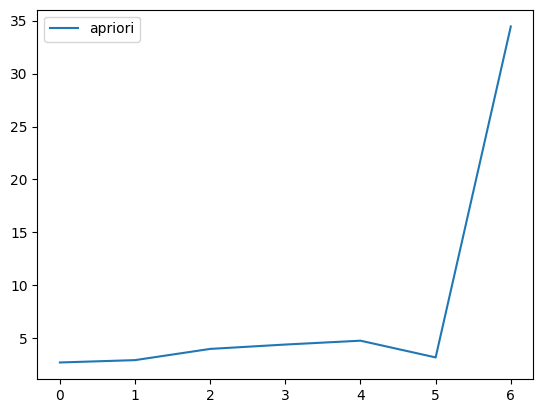

In [36]:
#plt apriori density
plt.plot(runtime_apriori_density, label='apriori')
plt.legend()
plt.show()

# APRIORI SIZE

In [13]:
#apriori size
runtime_apriori = []


for i in range(len(size_dataset)):
  dataset = pd.read_csv(size_dataset[i])

# I want the dataset to be a np.array
  dataset_array = np.array(dataset)

# since the array contains baskets with only a string of element and not a list of elements, I need to fix this thing
  new_array = []
  for i in range(len(dataset_array)):
      split_elements = np.char.split(dataset_array[i].astype(str))
      ok_split_elements = (split_elements[0])
      new_array.append(ok_split_elements)


# Example dataset
  dataset = new_array

# Minimum support
  min_support=0.2
 
  start = time.time()
# Apply the Apriori algorithm
  results = list(apriori(dataset, min_support=min_support))

# Print frequent itemsets and their support
  for itemset in results:
      items = list(itemset.items)
      support = itemset.support
    

  end = time.time()

  result_time = end - start

  runtime_apriori.append(result_time)
  

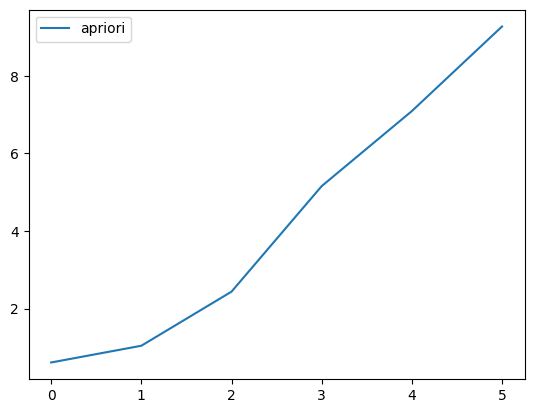

In [54]:
#plt apriori size
plt.plot(runtime_apriori, label='apriori')
plt.legend()
plt.show()

# FP-GROWTH ALGORITHM

#fp-growth
https://github.com/JackHCC/Apriori-and-FP_Growth/blob/master/FP_growth.py


In [16]:
#fp-growth

# fp-growth

from collections import defaultdict, namedtuple
import time

def find_frequent_itemsets(transactions, minimum_support, include_support=False):
    # Function to find frequent itemsets in the transactions dataset

    items = defaultdict(lambda: 0)

    for transaction in transactions:
        for item in transaction:
            items[item] += 1

    # Filtering frequent 1-itemsets
    items = dict((item, support) for item, support in items.items()
        if support >= minimum_support)

    def clean_transaction(transaction):
        transaction = filter(lambda v: v in items, transaction)
        transaction_list = list(transaction)
        transaction_list.sort(key=lambda v: items[v], reverse=True)
        return transaction_list

    # Constructing the FP-tree
    master = FPTree()
    for transaction in map(clean_transaction, transactions):
        master.add(transaction)

    def find_with_suffix(tree, suffix):
        for item, nodes in tree.items():
            support = sum(n.count for n in nodes)
            if support >= minimum_support and item not in suffix:
                found_set = [item] + suffix
                yield (found_set, support) if include_support else found_set

                cond_tree = conditional_tree_from_paths(tree.prefix_paths(item))
                for s in find_with_suffix(cond_tree, found_set):
                    yield s

    for itemset in find_with_suffix(master, []):
        yield itemset

class FPTree(object):
    # FP-tree data structure

    Route = namedtuple('Route', 'head tail')

    def __init__(self):
        # Initialize the root node and routes
        self._root = FPNode(self, None, None)
        self._routes = {}

    @property
    def root(self):
        # Create the root node
        return self._root

    def add(self, transaction):
        # Add a transaction to the tree
        point = self._root

        for item in transaction:
            next_point = point.search(item)
            if next_point:
                # Current node already exists
                next_point.increment()
            else:
                # Create a new node
                next_point = FPNode(self, item)
                point.add(next_point)

                # Update the routes
                self._update_route(next_point)

            point = next_point

    def _update_route(self, point):
        assert self is point.tree

        try:
            route = self._routes[point.item]
            route[1].neighbor = point  # route[1] is the tail
            self._routes[point.item] = self.Route(route[0], point)
        except KeyError:
            # Start a new node
            self._routes[point.item] = self.Route(point, point)

    def items(self):
        # Iterate over the items in the tree
        for item in self._routes.keys():
            yield (item, self.nodes(item))

    def nodes(self, item):
        # Iterate over the nodes associated with an item
        try:
            node = self._routes[item][0]
        except KeyError:
            return

        while node:
            yield node
            node = node.neighbor

    def prefix_paths(self, item):
        # Generate prefix paths for an item
        def collect_path(node):
            path = []
            while node and not node.root:
                path.append(node)
                node = node.parent
            path.reverse()
            return path

        return (collect_path(node) for node in self.nodes(item))

    def inspect(self):
        # Print the tree structure
        self.root.inspect(1)

        for item, nodes in self.items():
            for node in nodes:
                print('    %r' % node)

def conditional_tree_from_paths(paths):
    # Construct a conditional tree from paths
    tree = FPTree()
    condition_item = None
    items = set()

    for path in paths:
        if condition_item is None:
            condition_item = path[-1].item

        point = tree.root
        for node in path:
            next_point = point.search(node.item)
            if not next_point:
                # Add a new node to the tree
                items.add(node.item)
                count = node.count if node.item == condition_item else 0
                next_point = FPNode(tree, node.item, count)
                point.add(next_point)
                tree._update_route(next_point)
            point = next_point

    assert condition_item is not None

    # Calculate the counts for nodes
    for path in tree.prefix_paths(condition_item):
        count = path[-1].count
        for node in reversed(path[:-1]):
            node._count += count

    return tree

class FPNode(object):
    # FP-tree node

    def __init__(self, tree, item, count=1):
        self._tree = tree
        self._item = item
        self._count = count
        self._parent = None
        self._children = {}
        self._neighbor = None

    def add(self, child):
        # Add a child node

        if not isinstance(child, FPNode):
            raise TypeError("Can only add other FPNodes as children")

        if not child.item in self._children:
            self._children[child.item] = child
            child.parent = self

    def search(self, item):
        # Search for a child node with the given item
        try:
            return self._children[item]
        except KeyError:
            return None

    def __contains__(self, item):
        return item in self._children

    @property
    def tree(self):
        return self._tree

    @property
    def item(self):
        return self._item

    @property
    def count(self):
        return self._count

    def increment(self):
        if self._count is None:
            raise ValueError("Root nodes have no associated count.")
        self._count += 1

    @property
    def root(self):
        return self._item is None and self._count is None

    @property
    def leaf(self):
        return len(self._children) == 0

    @property
    def parent(self):
        return self._parent

    @parent.setter
    def parent(self, value):
        if value is not None and not isinstance(value, FPNode):
            raise TypeError("A node must have an FPNode as a parent.")
        if value and value.tree is not self.tree:
            raise ValueError("Cannot have a parent from another tree.")
        self._parent = value

    @property
    def neighbor(self):
        return self._neighbor

    @neighbor.setter
    def neighbor(self, value):
        if value is not None and not isinstance(value, FPNode):
            raise TypeError("A node must have an FPNode as a neighbor.")
        if value and value.tree is not self.tree:
            raise ValueError("Cannot have a neighbor from another tree.")
        self._neighbor = value

    @property
    def children(self):
        return tuple(self._children.values())

    def inspect(self, depth=0):
        for child in self.children:
            child.inspect(depth + 1)

    def __repr__(self):
        if self.root:
            return "<%s (root)>" % type(self).__name__
        return "<%s %r (%r)>" % (type(self).__name__, self.item, self.count)


In [ ]:
# Dataset
dataset = new_array
# Main function
if __name__ == '__main__':
    # Call find_frequent_itemsets() to generate frequent itemsets
    start = time.time()

    total_baskets = len(dataset)
    min_support = 0.2 * total_baskets

    frequent_itemsets = find_frequent_itemsets(dataset, minimum_support=min_support, include_support=True)

    result = []
    for itemset, support in frequent_itemsets:
        result.append((itemset, support))

    result = sorted(result, key=lambda i: i[0])
    for itemset, support in result:
        print(str(itemset) + ' ' + str(support/total_baskets))

    end = time.time()
    print('Execution time:', str(end - start))


# FP-GROWTH DENSITY

In [ ]:
#fp-growth density
runtime_fpgrowth_density = []
min_supporto = [0.04, 0.08, 0.12, 0.16, 0.2, 0.24, 0.28]
for i in range(len(density_dataset)):
  dataset = pd.read_csv(density_dataset[i])

# I want the dataset to be a np.array
  dataset_array = np.array(dataset)
  
  total_baskets = len(dataset)
  min_support = min_supporto[i] * total_baskets

# since the array contains baskets with only a string of element and not a list of elements, I need to fix this thing
  new_array = []
  for i in range(len(dataset_array)):
      split_elements = np.char.split(dataset_array[i].astype(str))
      ok_split_elements = (split_elements[0])
      new_array.append(ok_split_elements)
  # Dataset
  dataset = new_array
# Main function
  if __name__ == '__main__':
    # Call find_frequent_itemsets() to generate frequent itemsets
      start = time.time()

      
      

      frequent_itemsets = find_frequent_itemsets(dataset, minimum_support=min_support, include_support=True)

      result = []
      for itemset, support in frequent_itemsets:
          result.append((itemset, support))

      result = sorted(result, key=lambda i: i[0])
      for itemset, support in result:
          print(str(itemset) + ' ' + str(support/total_baskets))

      end = time.time()
      
      result_time = end - start
      runtime_fpgrowth_density.append(result_time)
 
  

In [18]:
runtime_fpgrowth_density

[1.624422550201416,
 1.4780783653259277,
 2.5017027854919434,
 2.3741652965545654,
 2.029702663421631,
 1.9479432106018066,
 4.510466575622559]

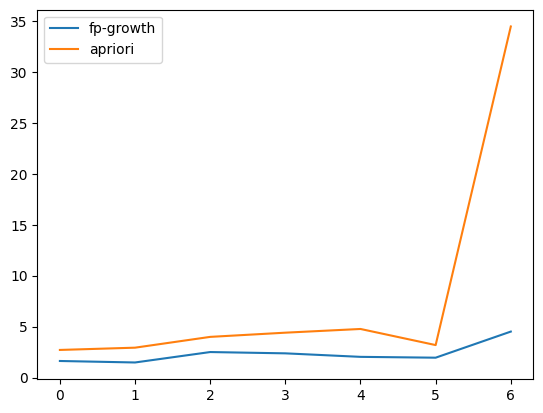

In [37]:
#plt fp-growh and apriori density
plt.plot(runtime_fpgrowth_density, label='fp-growth')
plt.plot(runtime_apriori_density, label='apriori')
plt.legend()
plt.show()

# FP-GROWTH SIZE

In [ ]:
#fp-growth size
runtime_fpgrowth = []

for i in range(len(size_dataset)):
  dataset = pd.read_csv(size_dataset[i])

# I want the dataset to be a np.array
  dataset_array = np.array(dataset)

  

# since the array contains baskets with only a string of element and not a list of elements, I need to fix this thing
  new_array = []
  for i in range(len(dataset_array)):
      split_elements = np.char.split(dataset_array[i].astype(str))
      ok_split_elements = (split_elements[0])
      new_array.append(ok_split_elements)
  # Dataset
  dataset = new_array
# Main function
  if __name__ == '__main__':
    # Call find_frequent_itemsets() to generate frequent itemsets
      start = time.time()

      total_baskets = len(dataset)
      min_support = 0.2 * total_baskets

      frequent_itemsets = find_frequent_itemsets(dataset, minimum_support=min_support, include_support=True)

      result = []
      for itemset, support in frequent_itemsets:
          result.append((itemset, support))

      result = sorted(result, key=lambda i: i[0])
      for itemset, support in result:
          print(str(itemset) + ' ' + str(support/total_baskets))

      end = time.time()
      
      result_time = end - start
      runtime_fpgrowth.append(result_time)

In [56]:
runtime_fpgrowth

[0.4619290828704834,
 1.409407377243042,
 1.5711033344268799,
 2.532895565032959,
 6.899446964263916,
 7.071784973144531]

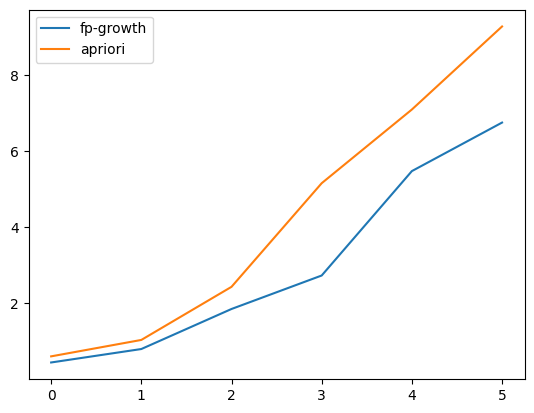

In [59]:
#plt fp-growth and apriori size
plt.plot(runtime_fpgrowth, label='fp-growth')
plt.plot(runtime_apriori, label='apriori')
plt.legend()
plt.show()

# FP-TREE

In [23]:
!pip install anytree

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 4.5 MB/s eta 0:00:00


In [24]:
from anytree import Node, RenderTree

# Define the itemsets and their support values
itemsets = result

# Create the root node
root = Node("Root")

# Create the tree nodes and add them to the tree
for itemset, support in itemsets:
    current_node = root
    for item in itemset:
        child_node = None
        for child in current_node.children:
            if child.name == item:
                child_node = child
                break
        if child_node is None:
            child_node = Node(item, parent=current_node)
        current_node = child_node

# Print the tree
for pre, fill, node in RenderTree(root):
    print("%s%s" % (pre, node.name))


Root
├── F0
├── F1
├── F10
├── F11
├── F12
├── F13
├── F14
├── F15
│   ├── F26
│   ├── F33
│   ├── F34
│   ├── F59
│   ├── F61
│   ├── F70
│   └── F83
├── F16
├── F17
├── F18
├── F19
├── F2
├── F20
├── F21
├── F22
├── F23
├── F24
├── F25
├── F26
├── F27
├── F28
├── F29
├── F3
├── F30
├── F31
│   ├── F1
│   ├── F15
│   ├── F29
│   ├── F33
│   ├── F54
│   ├── F57
│   ├── F59
│   ├── F6
│   ├── F66
│   ├── F70
│   ├── F71
│   ├── F75
│   ├── F78
│   ├── F83
│   └── F84
├── F32
├── F33
│   └── F74
├── F34
│   ├── F49
│   ├── F71
│   └── F83
├── F35
├── F36
│   ├── F49
│   └── F71
├── F37
├── F38
├── F39
├── F4
├── F40
│   ├── F15
│   ├── F58
│   ├── F61
│   ├── F78
│   ├── F84
│   └── F9
├── F41
│   ├── F15
│   ├── F16
│   ├── F25
│   ├── F28
│   ├── F31
│   ├── F33
│   ├── F36
│   ├── F39
│   ├── F40
│   ├── F49
│   ├── F53
│   ├── F58
│   ├── F59
│   ├── F71
│   ├── F83
│   ├── F86
│   └── F9
├── F42
├── F43
├── F44
├── F45
├── F46
├── F47
├── F48
├── F49
│   ├── F53
│   ├── F57
│   └── 

# ECLAT ALGORITHM

# ECLAT
https://github.com/jagdeep227/Frequent_itemset_mining/blob/main/Eclat_g.py


In [25]:
# eclat
#eclat
import time

FreqItems = dict()
support = dict()


def eclat(prefix, items, dict_id ,minsup,cnt):
    
    while items:
        i ,itids = items.pop()
        isupp = len(itids)
        if isupp >= minsup*cnt:
            print(prefix + [i], isupp/len(dataset))
            FreqItems[frozenset(prefix + [i])] = isupp
            suffix = []
            for j, ojtids in items:
                jtids = itids & ojtids
                if len(jtids ) >= minsup*cnt:
                    suffix.append((j, jtids))
            dict_id += 1
            eclat(prefix +[i], sorted(suffix, key=lambda item: len(item[1]), reverse=True), dict_id ,minsup,cnt)

In [ ]:
# Dataset
dataset = new_array
# Main function
if __name__ == '__main__':
    # Call find_frequent_itemsets() to generate frequent itemsets
    
    start = time.time()
    items = {}

    for transaction_id, transaction in enumerate(dataset):
        for item in transaction:
            if item in items:
                items[item].add(transaction_id)
            else:
                items[item] = {transaction_id}
    
    # Convert the dictionary items into a list of tuples
    items = [(item, itids) for item, itids in items.items()]
    
    
    cnt = len(dataset)
    minsup = 0.2
    # Function call to start ECLAT algorithm
    eclat([], sorted(items, key=lambda item: len(item[1]), reverse=True), 1, minsup, cnt)

    '''result = []
    for itemset, support in frequent_itemsets:
        result.append((itemset, support))'''

    '''result'''

    end = time.time()
    print('Execution time:', str(end - start))

# ECLAT SIZE

In [60]:
#eclat size

runtime_eclat = []

for i in range(len(size_dataset)):
  dataset = pd.read_csv(size_dataset[i])

# I want the dataset to be a np.array
  dataset_array = np.array(dataset)

  

# since the array contains baskets with only a string of element and not a list of elements, I need to fix this thing
  new_array = []
  for i in range(len(dataset_array)):
      split_elements = np.char.split(dataset_array[i].astype(str))
      ok_split_elements = (split_elements[0])
      new_array.append(ok_split_elements)
  # Dataset
  dataset = new_array
# Main function
  if __name__ == '__main__':
    # Call find_frequent_itemsets() to generate frequent itemsets
    
      
      items = {}

      for transaction_id, transaction in enumerate(dataset):
          for item in transaction:
              if item in items:
                items[item].add(transaction_id)
              else:
                items[item] = {transaction_id}
      start = time.time()
    # Convert the dictionary items into a list of tuples
      items = [(item, itids) for item, itids in items.items()]
    
    
      cnt = len(dataset)
      minsup = 0.2
    # Function call to start ECLAT algorithm
      eclat([], sorted(items, key=lambda item: len(item[1]), reverse=True), 1, minsup, cnt)

      end = time.time()
      result_time = end - start

      runtime_eclat.append(result_time)



['F9'] 0.22550225502255022
['F8'] 0.26485264852648527
['F5'] 0.2747427474274743
['F5', 'F6'] 0.2001920019200192
['F5', 'F3'] 0.2100521005210052
['F5', 'F2'] 0.21017210172101722
['F7'] 0.27549275492754927
['F7', 'F3'] 0.2001320013200132
['F7', 'F6'] 0.2105321053210532
['F0'] 0.2894828948289483
['F0', 'F1'] 0.2090520905209052
['F0', 'F2'] 0.2096720967209672
['F0', 'F3'] 0.21862218622186222
['F0', 'F6'] 0.2194721947219472
['F2'] 0.28969289692896927
['F2', 'F1'] 0.20515205152051522
['F2', 'F3'] 0.2195221952219522
['F1'] 0.2953029530295303
['F1', 'F6'] 0.2044720447204472
['F4'] 0.3042330423304233
['F4', 'F6'] 0.2044120441204412
['F4', 'F3'] 0.2048920489204892
['F6'] 0.30599305993059933
['F6', 'F3'] 0.22503225032250324
['F3'] 0.31085310853108533
['F8'] 0.23010230102301024
['F3'] 0.24970249702497024
['F3', 'F11'] 0.2050220502205022
['F6'] 0.25344253442534426
['F6', 'F11'] 0.2025120251202512
['F6', 'F1'] 0.2083720837208372
['F6', 'F10'] 0.21435214352143522
['F6', 'F2'] 0.21861218612186123
['F1

In [61]:
runtime_eclat

[0.1715686321258545,
 0.4465785026550293,
 2.1685831546783447,
 2.766145944595337,
 6.413609027862549,
 7.8428685665130615]

# ECLAT DENSITY

In [ ]:
#eclat density

runtime_eclat_density = []
min_supporto = [0.04, 0.08, 0.12, 0.16, 0.2, 0.24, 0.28]
for i in range(len(density_dataset)):
  dataset = pd.read_csv(density_dataset[i])

# I want the dataset to be a np.array
  dataset_array = np.array(dataset)
  

  minsup = min_supporto[i]

# since the array contains baskets with only a string of element and not a list of elements, I need to fix this thing
  new_array = []
  for i in range(len(dataset_array)):
      split_elements = np.char.split(dataset_array[i].astype(str))
      ok_split_elements = (split_elements[0])
      new_array.append(ok_split_elements)
  # Dataset
  dataset = new_array
# Main function
  if __name__ == '__main__':
    # Call find_frequent_itemsets() to generate frequent itemsets
    
      
      items = {}

      for transaction_id, transaction in enumerate(dataset):
          for item in transaction:
              if item in items:
                items[item].add(transaction_id)
              else:
                items[item] = {transaction_id}
      
    # Convert the dictionary items into a list of tuples
      items = [(item, itids) for item, itids in items.items()]
    
      start = time.time()
      cnt = len(dataset)
      
    # Function call to start ECLAT algorithm
      eclat([], sorted(items, key=lambda item: len(item[1]), reverse=True), 1, minsup, cnt)

      end = time.time()
      result_time = end - start

      runtime_eclat_density.append(result_time)



In [44]:
runtime_eclat_density

[1.0358390808105469,
 1.2449572086334229,
 2.090958968,
 2.3724565505981445,
 2.8725552558898926,
 1.7678875923156738,
 4.9098698]

# RESULTS

# RESULTS

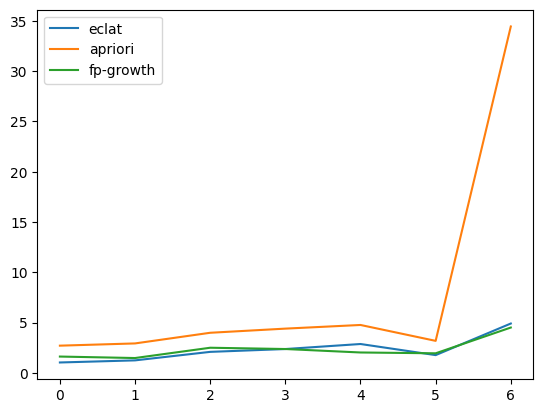

In [62]:
#density

plt.plot(runtime_eclat_density, label='eclat')
plt.plot(runtime_apriori_density, label='apriori')
plt.plot(runtime_fpgrowth_density, label='fp-growth')
plt.legend()
plt.show()


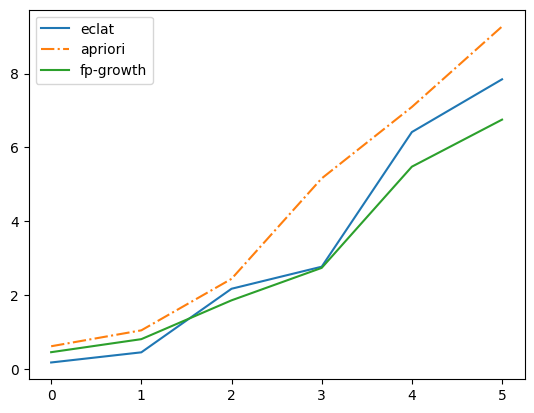

In [63]:
# size

plt.plot(runtime_eclat, label='eclat')
plt.plot(runtime_apriori, label='apriori', linestyle='-.')
plt.plot(runtime_fpgrowth, label='fp-growth')

plt.legend()
plt.show()
